# **Imports**

In [214]:
# Preprocessing
import zipfile as zf
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
# Add your libraries here

# **Read in the data**

In [215]:
# Use the current working directory
current_dir = os.getcwd()

# Kaggle
if current_dir == "/kaggle/working":
    current_dir = "/kaggle/input/"


file_test_path = f"{current_dir}/dog-breeds-recognition/testing.csv"
file_train_path = f"{current_dir}/dog-breeds-recognition/training.csv"

print(f"Test set: {file_test_path}")
print(f"Train set: {file_train_path}")

Test set: /Users/tomkwok/Developer/info911-project/dog-breeds-recognition/testing.csv
Train set: /Users/tomkwok/Developer/info911-project/dog-breeds-recognition/training.csv


In [216]:
# read in train
df_train = pd.read_csv(file_train_path, header=None)
print(f"Are there any null values in Train: {df_train.isnull().values.any()}")
df_train

Are there any null values in Train: False


,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,n02085620-Chihuahua\n02085620_5927.jpg,1,3.508880,0.928564,0.298451,0.202423,0.273040,0.073741,0.260721,2.454843,...,0.929986,0.959449,1.033072,0.104633,1.102810,0.058879,0.508010,0.386740,0.182575,0.764517
1,n02085620-Chihuahua\n02085620_4441.jpg,1,0.447207,0.152954,0.214087,1.132086,0.984579,0.352944,0.616292,1.692439,...,1.842100,0.193077,0.103465,1.228296,2.554505,0.303815,0.544647,0.715426,0.916348,0.240079
2,n02085620-Chihuahua\n02085620_1502.jpg,1,1.730776,0.405669,0.187414,0.365856,0.512063,0.772889,0.267891,0.160474,...,2.033174,0.272994,0.217314,1.633859,1.064902,0.221387,1.036172,0.591452,0.733662,1.475364
3,n02085620-Chihuahua\n02085620_1916.jpg,1,1.986778,0.475547,0.114825,0.263515,0.743351,0.053917,0.293086,0.466959,...,1.581877,0.216979,0.313218,2.389633,1.645630,0.348484,0.936218,0.733054,0.740681,1.340304
4,n02085620-Chihuahua\n02085620_13151.jpg,1,0.000000,0.993176,0.362772,0.117868,0.257813,0.817096,0.777969,0.930595,...,1.301286,0.631204,0.194294,0.170246,2.551018,0.000000,3.035839,0.058260,1.350222,3.290168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,n02116738-African_hunting_dog\n02116738_10614.jpg,120,0.051192,0.263571,1.953465,0.144953,1.881053,1.025135,1.309460,0.026804,...,0.804875,0.278833,0.003926,0.465810,0.050890,1.009473,1.667273,1.975637,0.620393,0.057779
11996,n02116738-African_hunting_dog\n02116738_9282.jpg,120,2.393783,0.583523,0.070011,2.168356,2.056204,0.418436,0.592864,2.390873,...,0.225061,0.229859,0.935760,0.655962,0.289180,0.623364,1.158500,1.949258,1.581664,0.121391
11997,n02116738-African_hunting_dog\n02116738_6754.jpg,120,0.082882,0.210209,1.683243,0.442680,2.221987,1.028761,2.321181,0.150616,...,0.237797,0.049576,0.205640,0.424587,0.558180,0.732412,1.422601,2.745240,0.044735,0.282376
11998,n02116738-African_hunting_dog\n02116738_9333.jpg,120,0.027123,0.675996,0.353758,0.421884,0.610241,0.311903,1.028679,0.632097,...,1.706490,0.396890,0.092548,1.995632,0.000000,1.191216,0.196342,0.957877,0.736384,0.034472


In [217]:
# read in test
df_test = pd.read_csv(file_test_path, header=None)
print(f"Are there any null values in Test: {df_test.isnull().values.any()}")
df_test

Are there any null values in Test: False


,0,1,2,3,4,5,6,7,8,9,...,504,505,506,507,508,509,510,511,512,513
0,n02085620-Chihuahua\n02085620_2650.jpg,1,2.750876,0.402823,0.490048,0.088944,0.067087,0.097192,0.188324,0.554036,...,1.009560,0.560529,0.000568,1.048601,1.888090,0.000000,0.072166,0.522479,0.072563,0.040364
1,n02085620-Chihuahua\n02085620_4919.jpg,1,3.723587,1.346295,0.413855,1.559932,2.922223,0.046513,0.065089,0.748078,...,0.800828,0.310406,0.141535,0.613455,1.598750,0.285342,2.139037,1.185468,2.046112,1.761059
2,n02085620-Chihuahua\n02085620_1765.jpg,1,0.971007,0.447430,0.136485,0.470510,0.371954,0.112476,0.265642,0.300397,...,0.944592,1.212590,0.189738,1.528287,2.109546,0.329096,1.496220,1.040246,0.000382,1.097506
3,n02085620-Chihuahua\n02085620_3006.jpg,1,1.874442,1.340326,0.430788,1.061602,0.018172,0.659020,0.024218,0.541496,...,2.426595,0.921312,0.569086,0.939952,1.300098,1.269613,0.131599,0.544578,0.598401,0.251547
4,n02085620-Chihuahua\n02085620_1492.jpg,1,0.254995,1.975686,0.795596,0.792883,0.491056,1.389314,0.066709,0.368587,...,1.439100,1.203172,0.787512,0.178735,0.667279,0.644420,1.120357,1.260047,0.071751,1.355075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8575,n02116738-African_hunting_dog\n02116738_4991.jpg,120,0.068341,0.824908,0.193437,0.906468,2.191380,0.567653,2.182863,0.541500,...,0.270837,0.148257,0.538312,0.221652,1.261061,0.393819,0.931265,1.368547,0.725584,1.802775
8576,n02116738-African_hunting_dog\n02116738_3024.jpg,120,0.012424,0.074204,1.992666,0.076113,0.573071,1.246892,0.586113,0.114273,...,0.544384,0.052004,0.279680,0.214920,1.575158,1.586292,1.686255,0.970767,1.198236,0.281134
8577,n02116738-African_hunting_dog\n02116738_3635.jpg,120,0.090567,0.394184,1.207222,0.123069,2.618800,0.823760,3.099759,0.373843,...,0.082895,0.005232,0.012785,0.310990,0.028843,1.175330,0.576579,1.986010,0.086537,0.805687
8578,n02116738-African_hunting_dog\n02116738_2988.jpg,120,0.249121,0.176359,2.857338,0.408916,0.582186,1.393884,2.366030,0.707135,...,0.592481,0.396963,0.142146,0.550736,0.031739,0.102475,2.250938,0.885802,1.031099,0.105213


# **Reformat Dataframe**
* The dataset doesn't come with column names, lets add some

In [218]:
def reformat_df(df):
  df = df.rename(columns={0:"image_path", 1:"target"})
  for header in df.columns[2:]:
    new_header = f"feature_{header-1}"
    df.rename(columns={header:new_header}, inplace=True)
  df = df.set_index("image_path")
  return df

In [219]:
df_train = reformat_df(df_train)
df_train

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
image_path,,,,,,,,,,,,,,,,,,,,,
n02085620-Chihuahua\n02085620_5927.jpg,1,3.508880,0.928564,0.298451,0.202423,0.273040,0.073741,0.260721,2.454843,0.677149,...,0.929986,0.959449,1.033072,0.104633,1.102810,0.058879,0.508010,0.386740,0.182575,0.764517
n02085620-Chihuahua\n02085620_4441.jpg,1,0.447207,0.152954,0.214087,1.132086,0.984579,0.352944,0.616292,1.692439,1.767242,...,1.842100,0.193077,0.103465,1.228296,2.554505,0.303815,0.544647,0.715426,0.916348,0.240079
n02085620-Chihuahua\n02085620_1502.jpg,1,1.730776,0.405669,0.187414,0.365856,0.512063,0.772889,0.267891,0.160474,1.124645,...,2.033174,0.272994,0.217314,1.633859,1.064902,0.221387,1.036172,0.591452,0.733662,1.475364
n02085620-Chihuahua\n02085620_1916.jpg,1,1.986778,0.475547,0.114825,0.263515,0.743351,0.053917,0.293086,0.466959,0.154945,...,1.581877,0.216979,0.313218,2.389633,1.645630,0.348484,0.936218,0.733054,0.740681,1.340304
n02085620-Chihuahua\n02085620_13151.jpg,1,0.000000,0.993176,0.362772,0.117868,0.257813,0.817096,0.777969,0.930595,1.155066,...,1.301286,0.631204,0.194294,0.170246,2.551018,0.000000,3.035839,0.058260,1.350222,3.290168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n02116738-African_hunting_dog\n02116738_10614.jpg,120,0.051192,0.263571,1.953465,0.144953,1.881053,1.025135,1.309460,0.026804,1.145573,...,0.804875,0.278833,0.003926,0.465810,0.050890,1.009473,1.667273,1.975637,0.620393,0.057779
n02116738-African_hunting_dog\n02116738_9282.jpg,120,2.393783,0.583523,0.070011,2.168356,2.056204,0.418436,0.592864,2.390873,0.191504,...,0.225061,0.229859,0.935760,0.655962,0.289180,0.623364,1.158500,1.949258,1.581664,0.121391
n02116738-African_hunting_dog\n02116738_6754.jpg,120,0.082882,0.210209,1.683243,0.442680,2.221987,1.028761,2.321181,0.150616,1.760209,...,0.237797,0.049576,0.205640,0.424587,0.558180,0.732412,1.422601,2.745240,0.044735,0.282376


In [220]:
df_test = reformat_df(df_test)
df_test

,target,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_503,feature_504,feature_505,feature_506,feature_507,feature_508,feature_509,feature_510,feature_511,feature_512
image_path,,,,,,,,,,,,,,,,,,,,,
n02085620-Chihuahua\n02085620_2650.jpg,1,2.750876,0.402823,0.490048,0.088944,0.067087,0.097192,0.188324,0.554036,0.597607,...,1.009560,0.560529,0.000568,1.048601,1.888090,0.000000,0.072166,0.522479,0.072563,0.040364
n02085620-Chihuahua\n02085620_4919.jpg,1,3.723587,1.346295,0.413855,1.559932,2.922223,0.046513,0.065089,0.748078,1.062587,...,0.800828,0.310406,0.141535,0.613455,1.598750,0.285342,2.139037,1.185468,2.046112,1.761059
n02085620-Chihuahua\n02085620_1765.jpg,1,0.971007,0.447430,0.136485,0.470510,0.371954,0.112476,0.265642,0.300397,1.756382,...,0.944592,1.212590,0.189738,1.528287,2.109546,0.329096,1.496220,1.040246,0.000382,1.097506
n02085620-Chihuahua\n02085620_3006.jpg,1,1.874442,1.340326,0.430788,1.061602,0.018172,0.659020,0.024218,0.541496,0.913266,...,2.426595,0.921312,0.569086,0.939952,1.300098,1.269613,0.131599,0.544578,0.598401,0.251547
n02085620-Chihuahua\n02085620_1492.jpg,1,0.254995,1.975686,0.795596,0.792883,0.491056,1.389314,0.066709,0.368587,1.323611,...,1.439100,1.203172,0.787512,0.178735,0.667279,0.644420,1.120357,1.260047,0.071751,1.355075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n02116738-African_hunting_dog\n02116738_4991.jpg,120,0.068341,0.824908,0.193437,0.906468,2.191380,0.567653,2.182863,0.541500,0.469749,...,0.270837,0.148257,0.538312,0.221652,1.261061,0.393819,0.931265,1.368547,0.725584,1.802775
n02116738-African_hunting_dog\n02116738_3024.jpg,120,0.012424,0.074204,1.992666,0.076113,0.573071,1.246892,0.586113,0.114273,1.963169,...,0.544384,0.052004,0.279680,0.214920,1.575158,1.586292,1.686255,0.970767,1.198236,0.281134
n02116738-African_hunting_dog\n02116738_3635.jpg,120,0.090567,0.394184,1.207222,0.123069,2.618800,0.823760,3.099759,0.373843,0.408895,...,0.082895,0.005232,0.012785,0.310990,0.028843,1.175330,0.576579,1.986010,0.086537,0.805687


In [221]:
df_test["target"].value_counts()

target
3      152
10     139
27     132
108    119
89     118
      ... 
71      50
101     50
83      50
4       49
18      48
Name: count, Length: 120, dtype: int64

# **Create train/validation/test splits**
* From the training set, we will create a small validation set which is going to be used to find the best Hyperparameter for the models.
* We cant use the test set because that will lead to something called model leakage!!!

In [222]:
# train features
X = df_train.iloc[:,1:]
# train labels
y = df_train.iloc[:,0]

# create the training & validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size=0.15, shuffle=True, random_state=7)

# re-assign the test set variables for consistency & shuffle
df_test = df_test.sample(frac = 1)
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [223]:
print(f"Training Data: {X_train.shape}")
print(f"Training Labels: {y_train.shape}")

print(f"Validation Data: {X_valid.shape}")
print(f"Validation Labels: {y_valid.shape}")

print(f"Testing Data: {X_test.shape}")
print(f"Testing Labels: {y_test.shape}")

Training Data: (10200, 512)
Training Labels: (10200,)
Validation Data: (1800, 512)
Validation Labels: (1800,)
Testing Data: (8580, 512)
Testing Labels: (8580,)


# **Preprocessing**
* Training & Validation datasets will be Normalised
* Most ML models expect the class values to start from zero to n. Our targets start from one to n, hence we need to fix this up.
* PCA will be used to create a secondary dataset which you will use to experiment to see if reducing the attributes will lead to better classification results

## ** 1)Normalize values**


In [224]:
# initialize the StandardScaler
stdsclr = StandardScaler()
# fit it to the trainset ONLY
stdsclr.fit(X_train)
# Apply it to Train data
X_train_sclr = stdsclr.transform(X_train)
# Apply it to Test data
X_test_sclr = stdsclr.transform(X_test)
# Apply it to Valid data
X_valid_sclr = stdsclr.transform(X_valid)

In [225]:
print(f"Train Data Scaled: {X_train_sclr.shape}")
print(f"Test Data Scaled: {X_test_sclr.shape}")
print(f"Validation Data Scaled: {X_valid_sclr.shape}")

Train Data Scaled: (10200, 512)
Test Data Scaled: (8580, 512)
Validation Data Scaled: (1800, 512)


## **2) Rebase target classes**
* subtract 1 from all target labels to shift the range from 0 to 119 instead of 1 to 120

In [226]:
y_train = y_train - 1
y_valid = y_valid - 1
y_test = y_test - 1

In [227]:
y_train.value_counts().sort_index()

target
0      84
1      84
2      93
3      89
4      90
       ..
115    84
116    85
117    86
118    82
119    79
Name: count, Length: 120, dtype: int64

## **3) PCA**
* A secondary dataset used for the experiment

In [228]:
# create PCA to keep 95% of the variance
pca = PCA(n_components=0.95)

# Fit PCA on the training dataset
pca.fit(X_train_sclr)

# Transform the training, validation, and test datasets
X_train_pca = pca.transform(X_train_sclr)
X_valid_pca = pca.transform(X_valid_sclr)
X_test_pca = pca.transform(X_test)

# Output the results
print("Transformed training set shape:", X_train_pca.shape)
print("Transformed validation set shape:", X_valid_pca.shape)
print("Transformed test set shape:", X_test_pca.shape)

Transformed training set shape: (10200, 256)
Transformed validation set shape: (1800, 256)
Transformed test set shape: (8580, 256)


/Users/tomkwok/.pyenv/versions/3.11.0/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [229]:
print(f"Training Data PCA: {X_train_pca.shape}")
print(f"Training Labels: {y_train.shape}")

print(f"Validation Data PCA: {X_valid_pca.shape}")
print(f"Validation Labels: {y_valid.shape}")

print(f"Testing Data PCA: {X_test_pca.shape}")
print(f"Testing Labels: {y_test.shape}")

Training Data PCA: (10200, 256)
Training Labels: (10200,)
Validation Data PCA: (1800, 256)
Validation Labels: (1800,)
Testing Data PCA: (8580, 256)
Testing Labels: (8580,)


# **Feature Selection**
* There are two popular feature selection techniques that can be used for numerical input data and a categorical (class) target variable.
* 1) **ANOVA-f Statistic** --> determine whether there are any statistically significant differences between the means of three or more independent (unrelated) groups
  * **Null Hypothesis (H0)**: The group means are equal.
  * **Alternative Hypothesis (H1)**: At least one group mean is different.
  * The F statistic is calculated as the ratio of the variance between the group means to the variance within the groups.
  * A higher F value indicates a greater variability between groups compared to within groups, which can lead to the rejection of the null hypothesis.
  * assumes normality of residuals and homogeneity of variances
* 2) **Mutual Information Statistics** --> measures how much information the presence/absence of one variable tells you about the presence/absence of another, thereby giving a measure of the variables' mutual dependence.
  * Value: It can range from 0 to positive infinity. A mutual information of 0 indicates that the variables are independent.
  * Mutual Information makes no assumptions about the distribution of data.


In [230]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt

In [231]:
def feature_section(train,valid,test, stat,k):
  fs = SelectKBest(score_func=stat, k=k)
  fs.fit(X_train_pca, y_train)
  train_fs = fs.transform(train)
  valid_fs = fs.transform(valid)
  test_fs = fs.transform(test)
  return train_fs, valid_fs, test_fs, fs

def display_fs(fs):
  plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
  plt.show()

## **ANOVA-f Statistic**

In [232]:
_,_,_,ftest = feature_section(X_train_pca, X_valid_pca, X_test_pca, f_classif, "all")
_,_,_,mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, "all")

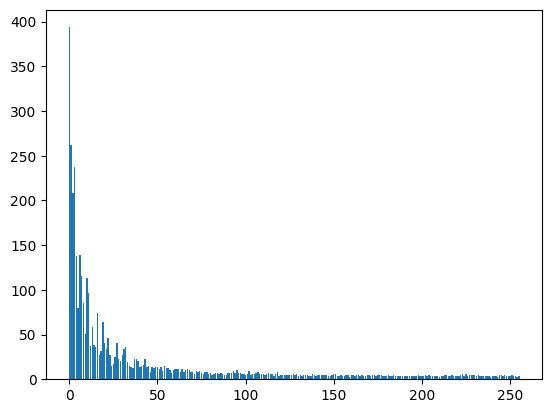

In [233]:
display_fs(ftest)

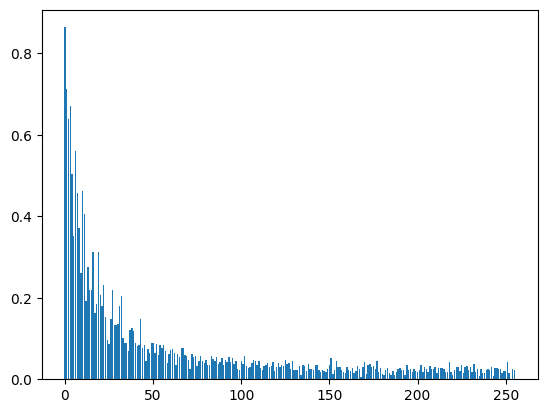

In [234]:
display_fs(mutalinfo)

# **Display Data Variables**

## **Dataset 1 - all features**

In [235]:
# # train
# X_train_sclr
# y_train
# # validation
X_valid_sclr
# y_valid
# test
X_test_sclr
# y_test

array([[ 1.94966107,  0.18496505, -0.78601894, ..., -0.90443371,
         0.88827766, -0.89756972],
       [-0.20158112, -0.10002208, -1.06094795, ..., -1.18751877,
         0.84509073, -0.65075529],
       [ 0.58508786,  0.13420418,  0.33231776, ...,  0.75136606,
         0.09679204, -0.88481864],
       ...,
       [-0.53054615,  0.42462846, -1.39193746, ...,  0.03965701,
         0.08380761,  1.01613138],
       [-0.57578934, -0.91508415, -0.1565441 , ..., -0.2081527 ,
        -1.19066349, -0.57501517],
       [-0.67404104, -0.0844767 ,  0.70395395, ..., -0.29035787,
        -1.00201099, -0.79689359]])

## **Dataset 2 - PCA**

In [236]:
# Dataset 2 - PCA
# train
X_train_pca
y_train
# validation
X_valid_pca
y_valid
# test
X_test_pca
y_test

image_path
n02097474-Tibetan_terrier\n02097474_8491.jpg                49
n02105641-Old_English_sheepdog\n02105641_4997.jpg           78
n02093256-Staffordshire_bullterrier\n02093256_11569.jpg     28
n02099712-Labrador_retriever\n02099712_7605.jpg             57
n02110185-Siberian_husky\n02110185_2604.jpg                 99
                                                          ... 
n02089973-English_foxhound\n02089973_1.jpg                  16
n02110958-pug\n02110958_14683.jpg                          102
n02108000-EntleBucher\n02108000_1512.jpg                    90
n02093991-Irish_terrier\n02093991_2822.jpg                  33
n02108089-boxer\n02108089_9076.jpg                          91
Name: target, Length: 8580, dtype: int64

### **Dataset 3 - PCA & Feature Selection**
* Please run this three times with different values of k.
  * k = 50
  * k = 100
  * k = 150
  * k = 200
* see which set gets the highest on the validation set

In [290]:
k = 200
X_train_pca_fs, X_valid_pca_fs, X_test_pca_fs, mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, k)

In [238]:
# Dataset 3 - PCA & Feature Selection
# train
X_train_pca_fs
y_train
# validation
X_valid_pca_fs
y_valid
# test
X_test_pca_fs
y_test

image_path
n02097474-Tibetan_terrier\n02097474_8491.jpg                49
n02105641-Old_English_sheepdog\n02105641_4997.jpg           78
n02093256-Staffordshire_bullterrier\n02093256_11569.jpg     28
n02099712-Labrador_retriever\n02099712_7605.jpg             57
n02110185-Siberian_husky\n02110185_2604.jpg                 99
                                                          ... 
n02089973-English_foxhound\n02089973_1.jpg                  16
n02110958-pug\n02110958_14683.jpg                          102
n02108000-EntleBucher\n02108000_1512.jpg                    90
n02093991-Irish_terrier\n02093991_2822.jpg                  33
n02108089-boxer\n02108089_9076.jpg                          91
Name: target, Length: 8580, dtype: int64

# **Model 3: Multi-layer Perceptron (MLP)**


In [239]:
# %pip install torch

import time
import statistics
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# Check PyTorch version and Apple Silicon support
print(torch.__version__)
# Is MPS even available? macOS 12.3+
print(torch.backends.mps.is_available())

# Was the current version of PyTorch built with MPS activated?
print(torch.backends.mps.is_built())

2.2.2
True
True


In [240]:
# Prepare the data for MLP
# Convert the data to tensors for training

def load_data(X_train, X_test, X_valid, y_train, y_test, y_valid):
    # Training
    X_train_tensor = torch.tensor(X_train)
    y_train_tensor = torch.tensor(y_train)
    train_data = TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = DataLoader(train_data)

    # Testing
    X_test_tensor = torch.tensor(X_test)
    y_test_tensor = torch.tensor(y_test)
    test_data = TensorDataset(X_test_tensor, y_test_tensor)
    test_loader = DataLoader(test_data)
    
    # Validation
    X_valid_tensor = torch.tensor(X_valid)
    y_valid_tensor = torch.tensor(y_valid)
    valid_data = TensorDataset(X_valid_tensor, y_valid_tensor)
    valid_loader = DataLoader(valid_data)
    
    # Print a summary of loaded data
    print("Data Summary:")
    print(f"Input features: {X_train.shape[1]}")
    print(f"Training data: {X_train_tensor.shape}, Training labels: {y_train_tensor.shape}")
    print(f"Validation data: {X_valid_tensor.shape}, Validation labels: {y_valid_tensor.shape}")
    print("-" * 50)
    
    return train_loader, valid_loader, test_loader

## Models
* **`MLP1_3HL`** - Default model, 3 hidden layers, default parameters -> to examine the effects of the number of features in the dataset
* **`MLP1_4HL`** - Default model, 4 hidden layers, default parameters -> to examine the effects of the number of hidden layers
* **`MLP2`** - Refined model, 4 hidden layers, increased neurons, dropout -> to examine the effects of the number of neurons in the hidden layers
* **`MLP3`** - Fine-tuned model, 4 hidden layers, increased neurons, dropout, grid search -> to find the best performing model

## Default model and parameters

In [241]:
# Default model, 3 hidden layers, default parameters
class MLP1_3HL(nn.Module):
    def __init__(self, input1, input2, input3, input4):
        super(MLP1_3HL, self).__init__()
        self.fc1 = nn.Linear(int(input1), int(input2))
        self.fc2 = nn.Linear(int(input2), int(input3))
        self.fc3 = nn.Linear(int(input3), int(input4))
        self.relu = nn.ReLU()

        # Initialize weights
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x

In [242]:
class MLP1_4HL(nn.Module):
    def __init__(self, input1, input2, input3, input4, input5):
        super(MLP1_4HL, self).__init__()
        self.fc1 = nn.Linear(int(input1), int(input2))
        self.fc2 = nn.Linear(int(input2), int(input3))
        self.fc3 = nn.Linear(int(input3), int(input4))
        self.fc4 = nn.Linear(int(input4), int(input5))
        self.relu = nn.ReLU()

        # Initialize weights
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.relu(x)
        x = self.fc4(x)
        return x

In [243]:
class MLP2(nn.Module):
    def __init__(self, input1, input2, input3, input4, input5):
        super(MLP2, self).__init__()
        self.fc1 = nn.Linear(int(input1), int(input2))
        self.fc2 = nn.Linear(int(input2), int(input3)) # Increase the number of neurons
        self.fc3 = nn.Linear(int(input3), int(input4))
        self.fc4 = nn.Linear(int(input4), int(input5))
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)  # Add dropout layer

        # Initialize weights
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)
        nn.init.xavier_uniform_(self.fc4.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc2(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc3(x)
        x = self.relu(x)
        x = self.dropout(x)  # Apply dropout
        x = self.fc4(x)
        return x

In [244]:
# Train the model
def train_model(model_loader, test_loader, validation_loader, num_epoch):
    # Summary of the model
    print('Training the model...')
    print(model)

    # Record the start time
    start_time = time.time()
    
    for epoch in range(num_epoch): # 10 epochs
        for i, (inputs, labels) in enumerate(model_loader):
            # Forward pass
            outputs = model(inputs.float())
            loss = criterion(outputs, labels) # Compute the loss
    
            # Zero the gradients
            optimizer.zero_grad()
            
            # Backward pass
            loss.backward()
            optimizer.step() # Update the weights
            
        scheduler.step()

        # Save the loss value

        # Calculate the confusion matrix and F1 score
        f1, cm = calculate_score(model, test_loader)
        
        # Evaluate on validation data and save the validation loss
        val_loss, val_accuracy = evaluate_model(model, validation_loader)
        tra_loss_values.append(loss.item())
        val_loss_values.append(val_loss)
        val_accuracy_values.append(val_accuracy)


        print(f'Epoch {epoch + 1}, Training Loss: {loss.item()}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy * 100}%')
        
    end_time = time.time()
    used_time = end_time - start_time
        
    print('Finished Training')
    
    summarize_model(model, num_epoch, used_time, f1, cm)

In [278]:
from sklearn.metrics import confusion_matrix, f1_score

# Evaluate the model
def evaluate_model(model, valid_loader):
    model.eval()  # Set the model to evaluation mode
    total_loss = 0
    total_accuracy = 0
    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in valid_loader:
            outputs = model(inputs.float())
            _, predicted = torch.max(outputs, 1)

            # Calculate loss    
            loss = criterion(outputs, labels)
            total_loss += loss.item()

            # Calculate accuracy
            accuracy = accuracy_score(predicted.numpy(), labels.numpy())
            total_accuracy += accuracy

    avg_loss = total_loss / len(valid_loader)
    avg_accuracy = total_accuracy / len(valid_loader)
    
    return avg_loss, avg_accuracy

# Calculate the confusion matrix and F1 score
def calculate_score(model, train_loader):
    model.eval()  # Set the model to evaluation mode
    y_pred = []
    y_true = []

    with torch.no_grad():  # Disable gradient calculation
        for inputs, labels in train_loader:
            outputs = model(inputs.float())
            _, predicted = torch.max(outputs, 1)
            y_pred.extend(predicted.numpy())
            y_true.extend(labels.numpy())
   
    f1 = f1_score(y_true, y_pred, average='weighted')
    cm = confusion_matrix(y_true, y_pred)
    
    # Save the confusion matrix as a CSV file
    df_cm = pd.DataFrame(cm)
    df_cm.to_csv(f"output/cm-{model_name}.csv", index=False)
    
    return f1, cm

In [279]:
def summarize_model(model, num_epoch, used_time, f1, cm):
    # Summary of the model
    print("-" * 50)
    print("Model Summary:")
    print(model)
    
    # Loss function
    print("\nLoss function:")
    print(criterion)
    
    # Optimizer
    print("\nOptimizer:")
    print(optimizer)
    
    # Learning rate scheduler
    print("\nLearning Rate Scheduler:")
    print(scheduler)
    
    # Number of epochs
    print(f"\nNumber of Epochs: {num_epoch}")
    
    # Final training loss and validation loss
    print(f"\nFinal Training Loss: {tra_loss_values[-1]}")
    print(f"Final Validation Loss: {val_loss_values[-1]}")
    
    # Average validation loss and accuracy
    print(f"\nAverage Validation Loss: {statistics.mean(val_loss_values)}")
    
    # F1 score
    print(f"\nF1 Score: {f1}")
    
    # Confusion matrix
    print(f"\nConfusion Matrix: {cm}")
    
    # Total time taken for training
    print(f"\nTotal Training Time: {used_time // 60} minutes, {used_time % 60:.2f} seconds. That is {used_time:.2f} seconds.")
    
    # Visualize the loss values and confusion matrix
    plot_learning_curve(tra_loss_values, val_loss_values, model_name)
    plot_confusion_matrix(cm)
    

In [280]:
# Export output data from each epoch
def export_output_data(model_name):
    # Create a DataFrame to store the output data
    output_data = pd.DataFrame({
        'Epoch': range(1, len(tra_loss_values) + 1),
        'Training Loss': tra_loss_values,
        'Validation Loss': val_loss_values,
        'Validation Accuracy': val_accuracy_values
    })
    
    # Save the output data to a CSV file
    output_data.to_csv(f"output/{model_name}/{model_name}.csv", index=False)
    print(f"Output data saved as: {model_name}.csv")

In [281]:
# Visualize the loss values
# %pip install matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

def plot_learning_curve(loss_values, val_loss_values, model_name):
    plt.clf()
    plt.plot(loss_values, label='Training Loss')
    plt.plot(val_loss_values, label='Validation Loss')
    plt.title('Learning Curve')
    plt.xlabel('Epoch')
    
    # Display the x-axis labels every 5 epochs
    plt.xticks(range(0, len(loss_values), 5))
    
    plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f"output/lc-{model_name}.pdf")
    plt.show()
    
def plot_confusion_matrix(cm):
    plt.clf()
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.savefig(f"output/cm-{model_name}.pdf")
    plt.show()

# Train the model
1. Using `MLP1_3HL` model to find out the best dataset to use
2. Using `MLP1_4HL` model to decide the numbers of hidden layers to use
3. Using `MLP2` model to decide the best numbers of features to use
4. Grid search for building `MLP3` model
5. Using `MLP3` model to fine-tune the model

## Which dataset is the best to use?

In [282]:
# train_loader, valid_loader, test_loader = load_data(X_train_sclr, X_valid_sclr, X_test_sclr, y_train, y_valid, y_test)
# print(len(X_train_sclr), len(X_valid_sclr), len(X_test), len(y_train), len(y_valid), len(y_test))

print(len(X_train_sclr), len(X_valid_sclr), len(X_test_sclr), len(y_train), len(y_valid), len(y_test))

10200 1800 8580 10200 1800 8580


/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Data Summary:
Input features: 512
Training data: torch.Size([10200, 512]), Training labels: torch.Size([10200])
Validation data: torch.Size([1800, 512]), Validation labels: torch.Size([1800])
--------------------------------------------------
Training the model...
MLP1_3HL(
  (fc1): Linear(in_features=512, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=120, bias=True)
  (relu): ReLU()
)
Epoch 1, Training Loss: 1.012351632118225, Validation Loss: 1.4385212800068146, Validation Accuracy: 57.31934731934732%
Epoch 2, Training Loss: 1.4088616371154785, Validation Loss: 1.3108725318814851, Validation Accuracy: 60.675990675990676%
Epoch 3, Training Loss: 1.55568265914917, Validation Loss: 1.235742215158018, Validation Accuracy: 62.7039627039627%
Epoch 4, Training Loss: 1.5930430889129639, Validation Loss: 1.1886602690364498, Validation Accuracy: 64.52214452214452%
Epoch 5, Training Loss: 1.49994266033172

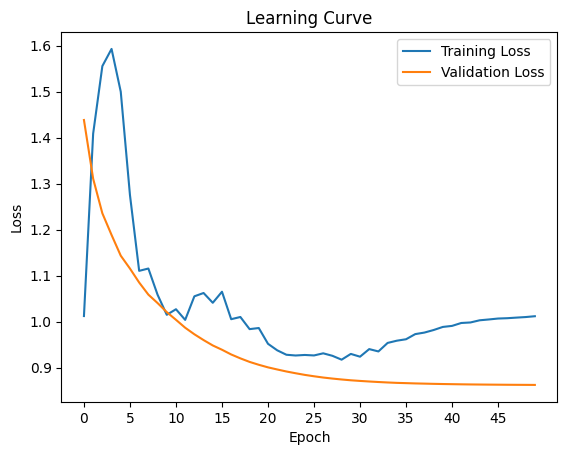

<Figure size 640x480 with 0 Axes>

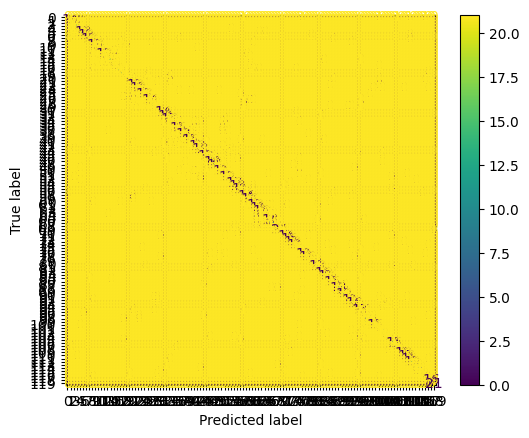

Output data saved as: eva-default-3hl-512features-50epochs.csv
Model saved as: f'default-3hl-512features-50epochs.pth'


In [283]:
model_name = "default-3hl-512features-50epochs"

# Create an instance of the model, and define the loss function and optimizer
model = MLP1_3HL(512, 256, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
# train_loader, valid_loader = load_data(X_train_pca_fs, X_valid_pca_fs, y_train, y_valid)    # Using PCA & feature selection
# train_loader, valid_loader = load_data(X_train_pca, X_valid_pca, y_train, y_valid)    # Using PCA
train_loader, test_loader, valid_loader = load_data(X_train_sclr, X_test_sclr, X_valid_sclr, y_train, y_test, y_valid)  # Using all features

train_model(train_loader, test_loader, valid_loader, 50)
# Save the model

# Export the output data
export_output_data(f"eva-{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"output/{model_name}/{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Data Summary:
Input features: 256
Training data: torch.Size([10200, 256]), Training labels: torch.Size([10200])
Validation data: torch.Size([1800, 256]), Validation labels: torch.Size([1800])
--------------------------------------------------
Training the model...
MLP1_3HL(
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=120, bias=True)
  (relu): ReLU()
)
Epoch 1, Training Loss: 0.8876233696937561, Validation Loss: 1.6794652405050572, Validation Accuracy: 59.731934731934736%
Epoch 2, Training Loss: 0.8065416216850281, Validation Loss: 1.5614863569014608, Validation Accuracy: 60.22144522144522%
Epoch 3, Training Loss: 0.9105067849159241, Validation Loss: 1.4924180238345954, Validation Accuracy: 61.67832167832168%
Epoch 4, Training Loss: 0.8556480407714844, Validation Loss: 1.4187170281788086, Validation Accuracy: 63.193473193473196%
Epoch 5, Training Loss: 0.93479681

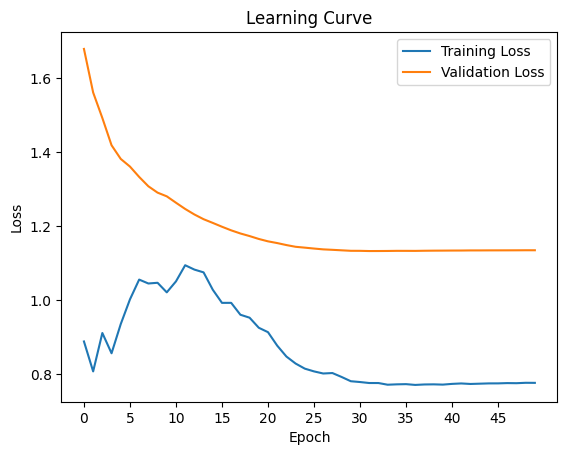

<Figure size 640x480 with 0 Axes>

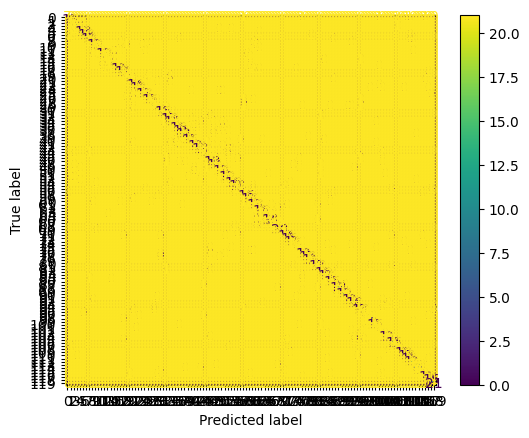

Output data saved as: eva-default-3hl-pca-256features-50epochs.csv
Model saved as: f'default-3hl-pca-256features-50epochs.pth'


In [284]:
# Create an instance of the model, and define the loss function and optimizer
model = MLP1_3HL(256, 128, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
train_loader, test_loader, valid_loader = load_data(X_train_pca, X_test_pca, X_valid_pca, y_train, y_test, y_valid)    # Using PCA

train_model(train_loader, test_loader, valid_loader, 50)
# Save the model
model_name = f"default-3hl-pca-256features-50epochs"

# Export the output data
export_output_data(f"eva-{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"output/{model_name}/{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

## How many hidden layers should be used for the best performance?

/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Data Summary:
Input features: 512
Training data: torch.Size([10200, 512]), Training labels: torch.Size([10200])
Validation data: torch.Size([1800, 512]), Validation labels: torch.Size([1800])
--------------------------------------------------
Training the model...
MLP1_4HL(
  (fc1): Linear(in_features=512, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=120, bias=True)
  (relu): ReLU()
)
Epoch 1, Training Loss: 2.04156494140625, Validation Loss: 1.748221340137275, Validation Accuracy: 47.55555555555556%
Epoch 2, Training Loss: 1.2041079998016357, Validation Loss: 1.5353857814806462, Validation Accuracy: 53.166666666666664%
Epoch 3, Training Loss: 1.481806755065918, Validation Loss: 1.4141374000796996, Validation Accuracy: 57.166666666666664%
Epoch 4, Training Loss: 0.9580515623092651, Validation Loss: 1.3407093234890555, Validation Accur

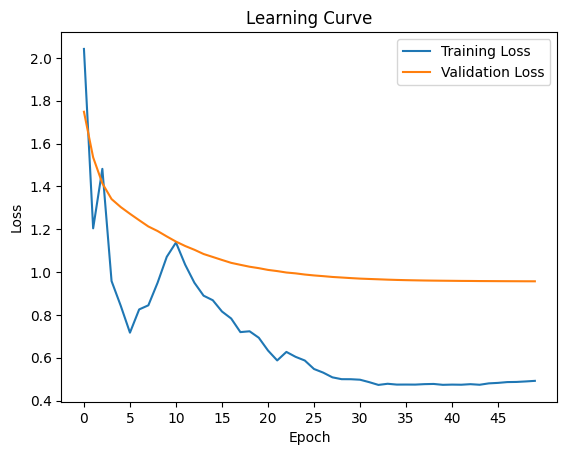

<Figure size 640x480 with 0 Axes>

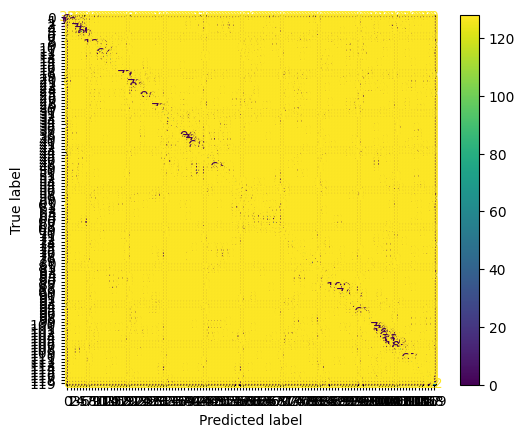

Output data saved as: eva-default-4hl-pca-256features-50epochs.csv
Model saved as: f'default-4hl-pca-256features-50epochs.pth'


In [288]:
# Create an instance of the model, and define the loss function and optimizer
model = MLP1_4HL(512, 512, 256, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
# train_loader, valid_loader = load_data(X_train_pca_fs, X_valid_pca_fs, y_train, y_valid)    # Using PCA & feature selection
# train_loader, valid_loader = load_data(X_train_pca, X_valid_pca, y_train, y_valid)    # Using PCA
train_loader, valid_loader, test_loader = load_data(X_train_sclr, X_test_sclr, X_valid_sclr, y_train, y_test, y_valid)  # Using all features

train_model(train_loader, test_loader, valid_loader, 50)
# Save the model
model_name = f"default-4hl-pca-256features-50epochs"

# Export the output data
export_output_data(f"eva-{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"output/{model_name}/{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

Data Summary:
Input features: 256
Training data: torch.Size([10200, 256]), Training labels: torch.Size([10200])
Validation data: torch.Size([1800, 256]), Validation labels: torch.Size([1800])
--------------------------------------------------
Training the model...
MLP1_4HL(
  (fc1): Linear(in_features=256, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=120, bias=True)
  (relu): ReLU()
)


/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Epoch 1, Training Loss: 1.4850118160247803, Validation Loss: 1.6654994353188926, Validation Accuracy: 50.44444444444445%
Epoch 2, Training Loss: 1.1471816301345825, Validation Loss: 1.457201572635224, Validation Accuracy: 56.222222222222214%
Epoch 3, Training Loss: 0.676206648349762, Validation Loss: 1.3461045230691606, Validation Accuracy: 60.16666666666667%
Epoch 4, Training Loss: 0.7695713639259338, Validation Loss: 1.2551443935879958, Validation Accuracy: 63.0%
Epoch 5, Training Loss: 0.7471300363540649, Validation Loss: 1.2072028120883624, Validation Accuracy: 64.22222222222223%
Epoch 6, Training Loss: 0.824526846408844, Validation Loss: 1.164434361909516, Validation Accuracy: 65.83333333333333%
Epoch 7, Training Loss: 0.7096123099327087, Validation Loss: 1.1376858476185912, Validation Accuracy: 66.22222222222223%
Epoch 8, Training Loss: 0.763951301574707, Validation Loss: 1.1141827103325501, Validation Accuracy: 66.16666666666666%
Epoch 9, Training Loss: 0.7202718257904053, Valid

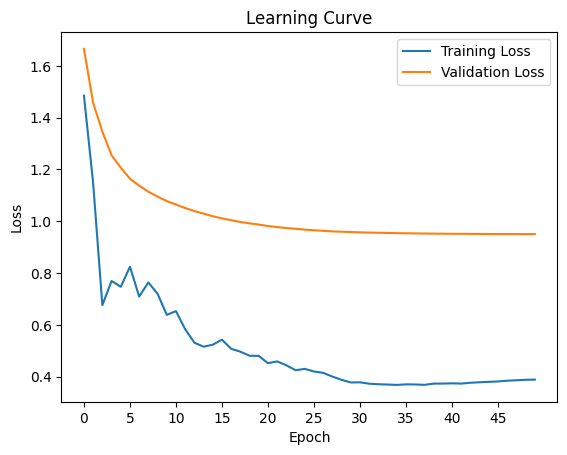

<Figure size 640x480 with 0 Axes>

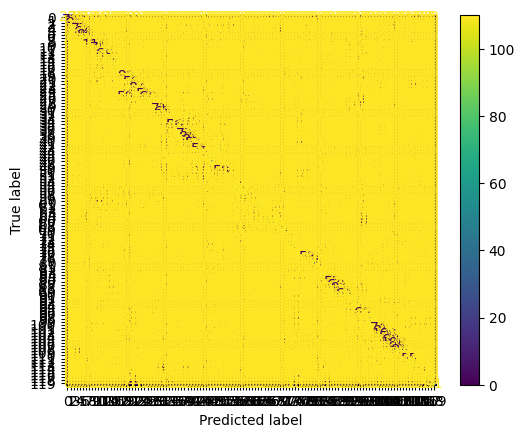

Output data saved as: eva-default-4hl-pca-256features-50epochs.csv
Model saved as: f'default-4hl-pca-256features-50epochs.pth'


In [289]:
# Create an instance of the model, and define the loss function and optimizer
model = MLP1_4HL(256, 512, 256, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
train_loader, valid_loader, test_loader = load_data(X_train_pca, X_test_pca, X_valid_pca, y_train, y_test, y_valid)  # Using all features

train_model(train_loader, test_loader, valid_loader, 50)
# Save the model
model_name = f"default-4hl-pca-256features-50epochs"

# Export the output data
export_output_data(f"eva-{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"output/{model_name}/{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Data Summary:
Input features: 50
Training data: torch.Size([10200, 50]), Training labels: torch.Size([10200])
Validation data: torch.Size([1800, 50]), Validation labels: torch.Size([1800])
--------------------------------------------------
Training the model...
MLP1_4HL(
  (fc1): Linear(in_features=50, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=120, bias=True)
  (relu): ReLU()
)
Epoch 1, Training Loss: 2.481140375137329, Validation Loss: 1.5123889284190308, Validation Accuracy: 55.166666666666664%
Epoch 2, Training Loss: 1.51955246925354, Validation Loss: 1.3721154516888137, Validation Accuracy: 59.66666666666667%
Epoch 3, Training Loss: 1.5301135778427124, Validation Loss: 1.2947417835312727, Validation Accuracy: 61.27777777777778%
Epoch 4, Training Loss: 1.5975701808929443, Validation Loss: 1.2397909751192653, Validation Accuracy:

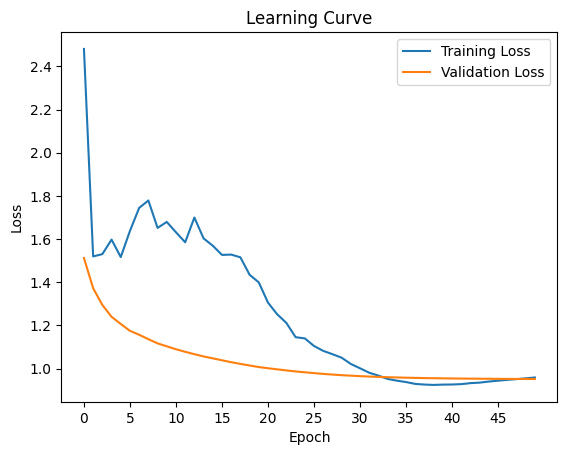

<Figure size 640x480 with 0 Axes>

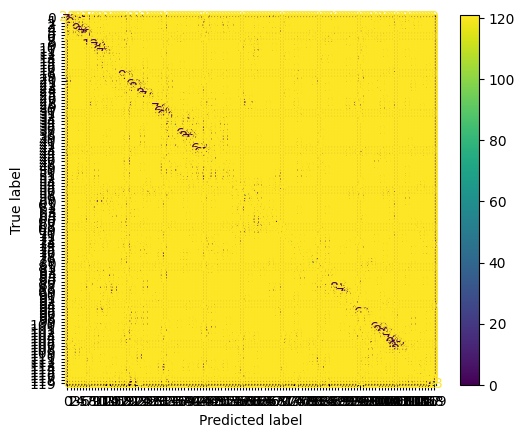

Output data saved as: eva-default-4hl-pca-256features-50epochs.csv
Model saved as: f'default-4hl-pca-256features-50epochs.pth'


In [292]:
k = 50
X_train_pca_fs, X_valid_pca_fs, X_test_pca_fs, mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, k)

# Create an instance of the model, and define the loss function and optimizer
model = MLP1_4HL(50, 100, 150, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
train_loader, valid_loader, test_loader = load_data(X_train_pca_fs, X_test_pca_fs, X_valid_pca_fs, y_train, y_test, y_valid)  # Using all features

iterations = 50

train_model(train_loader, test_loader, valid_loader, iterations)
# Save the model
model_name = f"default-4hl-pca-{k}features-{iterations}epochs"

# Export the output data
export_output_data(f"eva-{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"output/{model_name}/{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Data Summary:
Input features: 100
Training data: torch.Size([10200, 100]), Training labels: torch.Size([10200])
Validation data: torch.Size([1800, 100]), Validation labels: torch.Size([1800])
--------------------------------------------------
Training the model...
MLP1_4HL(
  (fc1): Linear(in_features=100, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=120, bias=True)
  (relu): ReLU()
)
Epoch 1, Training Loss: 1.3704479932785034, Validation Loss: 1.5542030939492462, Validation Accuracy: 52.83333333333333%
Epoch 2, Training Loss: 0.9621815085411072, Validation Loss: 1.392094831352879, Validation Accuracy: 58.833333333333336%
Epoch 3, Training Loss: 0.8120834827423096, Validation Loss: 1.3108760716546224, Validation Accuracy: 60.38888888888889%
Epoch 4, Training Loss: 0.6341102123260498, Validation Loss: 1.2603497210384942, Validation Acc

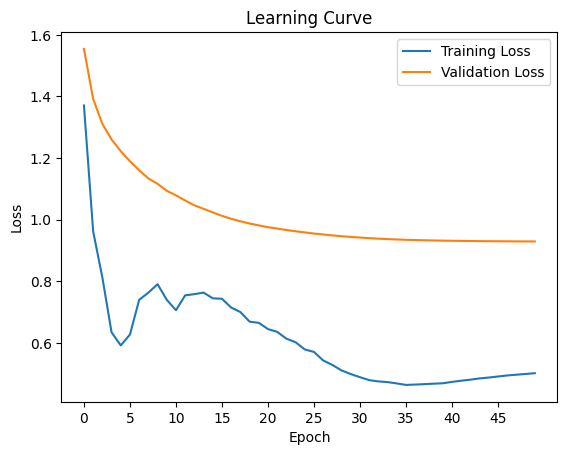

<Figure size 640x480 with 0 Axes>

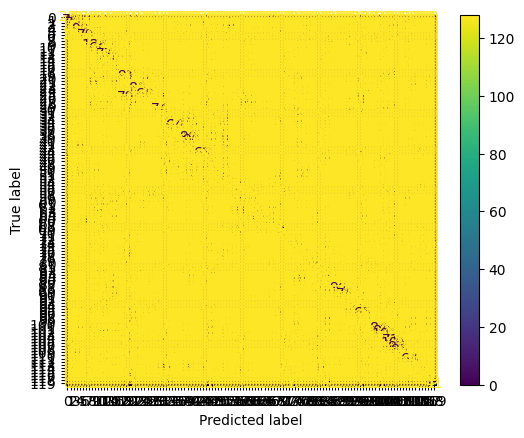

Output data saved as: eva-default-4hl-pca-256features-50epochs.csv
Model saved as: f'default-4hl-pca-256features-50epochs.pth'


In [295]:
k = 100
X_train_pca_fs, X_valid_pca_fs, X_test_pca_fs, mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, k)

# Create an instance of the model, and define the loss function and optimizer
model = MLP1_4HL(100, 200, 150, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
train_loader, valid_loader, test_loader = load_data(X_train_pca_fs, X_test_pca_fs, X_valid_pca_fs, y_train, y_test, y_valid)  # Using selected features

iterations = 50

train_model(train_loader, test_loader, valid_loader, iterations)
# Save the model
model_name = f"default-4hl-pca-{k}features-{iterations}epochs"

# Export the output data
export_output_data(f"eva-{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"output/{model_name}/{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Data Summary:
Input features: 150
Training data: torch.Size([10200, 150]), Training labels: torch.Size([10200])
Validation data: torch.Size([1800, 150]), Validation labels: torch.Size([1800])
--------------------------------------------------
Training the model...
MLP1_4HL(
  (fc1): Linear(in_features=150, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=150, bias=True)
  (fc3): Linear(in_features=150, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=120, bias=True)
  (relu): ReLU()
)
Epoch 1, Training Loss: 1.671823501586914, Validation Loss: 1.5867392659957922, Validation Accuracy: 53.166666666666664%
Epoch 2, Training Loss: 1.2818493843078613, Validation Loss: 1.4133926948102695, Validation Accuracy: 57.611111111111114%
Epoch 3, Training Loss: 1.3019795417785645, Validation Loss: 1.3227680791148062, Validation Accuracy: 59.94444444444444%
Epoch 4, Training Loss: 1.2897881269454956, Validation Loss: 1.2609119207373198, Validation Ac

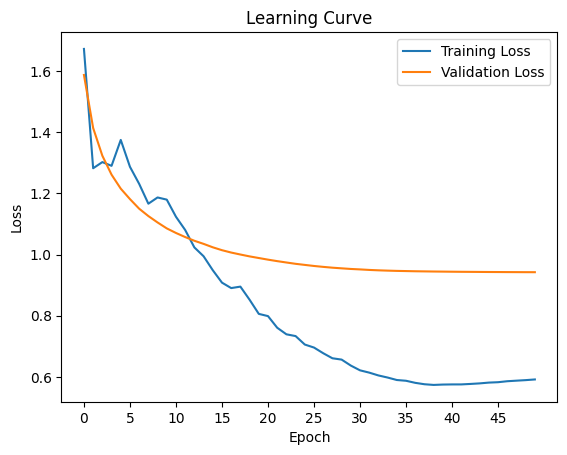

<Figure size 640x480 with 0 Axes>

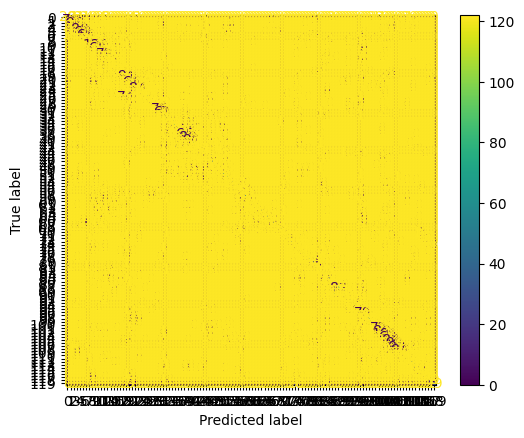

Output data saved as: eva-default-4hl-pca-256features-50epochs.csv
Model saved as: f'default-4hl-pca-256features-50epochs.pth'


In [296]:
k = 150
X_train_pca_fs, X_valid_pca_fs, X_test_pca_fs, mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, k)

# Create an instance of the model, and define the loss function and optimizer
model = MLP1_4HL(150, 256, 150, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
train_loader, valid_loader, test_loader = load_data(X_train_pca_fs, X_test_pca_fs, X_valid_pca_fs, y_train, y_test, y_valid)  # Using selected features

iterations = 50

train_model(train_loader, test_loader, valid_loader, iterations)
# Save the model
model_name = f"default-4hl-pca-{k}features-{iterations}epochs"

# Export the output data
export_output_data(f"eva-{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_tensor = torch.tensor(y_train)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_test_tensor = torch.tensor(y_test)
/var/folders/kt/y0r0pcx938l9pnmjlxpbm8zm0000gn/T/ipykernel_89871/3416936515.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by positi

Data Summary:
Input features: 200
Training data: torch.Size([10200, 200]), Training labels: torch.Size([10200])
Validation data: torch.Size([1800, 200]), Validation labels: torch.Size([1800])
--------------------------------------------------
Training the model...
MLP1_4HL(
  (fc1): Linear(in_features=200, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=200, bias=True)
  (fc3): Linear(in_features=200, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=120, bias=True)
  (relu): ReLU()
)
Epoch 1, Training Loss: 1.0829261541366577, Validation Loss: 1.5975374447383284, Validation Accuracy: 53.27777777777778%
Epoch 2, Training Loss: 0.7078040242195129, Validation Loss: 1.4147121057857293, Validation Accuracy: 58.55555555555556%
Epoch 3, Training Loss: 0.6818578839302063, Validation Loss: 1.3369988075269308, Validation Accuracy: 60.611111111111114%
Epoch 4, Training Loss: 0.8341506123542786, Validation Loss: 1.267954130672022, Validation Acc

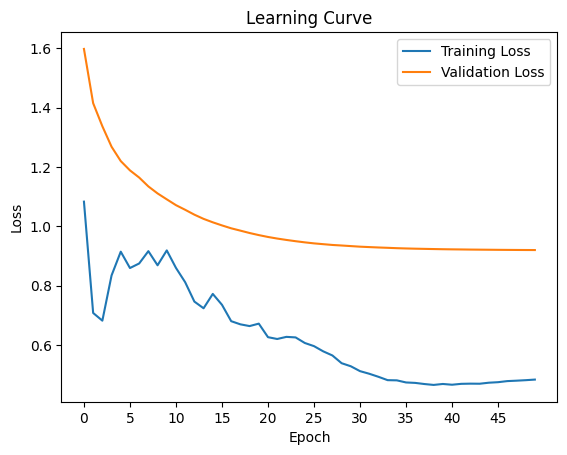

<Figure size 640x480 with 0 Axes>

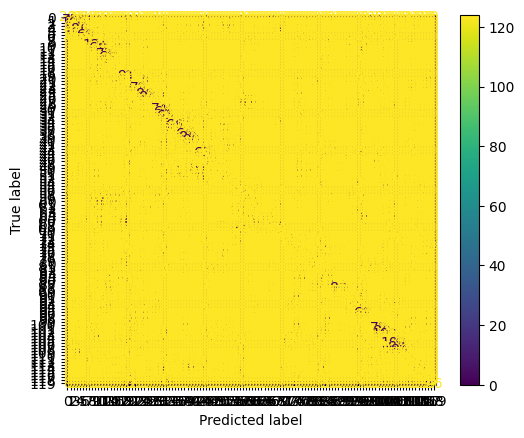

Output data saved as: eva-default-4hl-pca-256features-50epochs.csv
Model saved as: f'default-4hl-pca-256features-50epochs.pth'


In [297]:
k = 200
X_train_pca_fs, X_valid_pca_fs, X_test_pca_fs, mutalinfo = feature_section(X_train_pca, X_valid_pca, X_test_pca, mutual_info_classif, k)

# Create an instance of the model, and define the loss function and optimizer
model = MLP1_4HL(200, 256, 200, 128, 120)       # features
criterion = nn.CrossEntropyLoss() # Loss function: Cross-entropy loss
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  # Add weight decay for L2 regularization
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.9)  # Add learning rate 

# Initialize the loss values and validation loss values
tra_loss_values = []
val_loss_values = []
val_accuracy_values = []

# Train the model
train_loader, valid_loader, test_loader = load_data(X_train_pca_fs, X_test_pca_fs, X_valid_pca_fs, y_train, y_test, y_valid)  # Using selected features

train_model(train_loader, test_loader, valid_loader, 50)
# Save the model
model_name = f"default-4hl-pca-256features-50epochs"

# Export the output data
export_output_data(f"eva-{model_name}")

# Save the model for validation and future use
torch.save(model.state_dict(), f"output/{model_name}/{model_name}.pth")
print(f"Model saved as: f'{model_name}.pth'")

In [ ]:
# # Grid Search for the best performing model -> MLP3
# 
# from sklearn.model_selection import GridSearchCV
# from sklearn.neural_network import MLPClassifier
# 
# # Define the parameter grid
# param_grid = {
#     # 'hidden_layer_sizes': [(100, 150, 200, 150), (256, 512, 256, 128), (512, 1024, 512, 256)],  # Different sizes for the hidden layer
#     'activation': ['relu', 'tanh'],     # Different activation functions
#     'alpha': [0.01, 0.001, 0.0001],     # Different values for regularization parameter
#     'learning_rate': ['constant', 'adaptive'],  # Different learning rates
#     'solver': ['adam', 'sgd']   # Different solvers
# }
# 
# # Create the MLPClassifier
# mlp = MLPClassifier(max_iter=100)
# 
# # Create the GridSearchCV object
# grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='f1_weighted')
# 
# # Fit the GridSearchCV to the data
# grid_search.fit(X_train_pca_fs, y_train)
# 
# # Print the best parameters
# print(f"Best parameters: {grid_search.best_params_}")
# print(f"Best score: {grid_search.best_score_}")